<a href="https://colab.research.google.com/github/larrymoralez/ML-HW-3/blob/master/ML_HW_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications.vgg19 import preprocess_input, decode_predictions
from keras import backend as K
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os
import zipfile
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-19 22:27:08--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  72.5MB/s    in 0.9s    

2019-04-19 22:27:09 (72.5 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

dir = '/tmp/cats_and_dogs_filtered'

train_data = os.path.join(dir, 'train')
val_data = os.path.join(dir, 'validation')

train_cats = os.path.join(train_data, 'cats')
train_dogs = os.path.join(train_data, 'dogs')
val_cats = os.path.join(val_data, 'cats')
val_dogs = os.path.join(val_data, 'dogs')

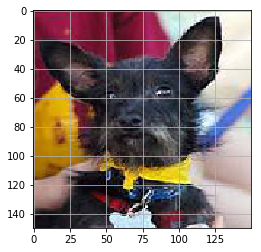

In [154]:
dog_img1 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2001.jpg'
dog_img2 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2002.jpg'
dog_img3 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2003.jpg'
dog_img4 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2004.jpg'
dog_img5 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2005.jpg'
dog_img6 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2006.jpg'
dog_img7 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2007.jpg'
dog_img8 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2008.jpg'
dog_img9 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2009.jpg'
dog_img10 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2010.jpg'


img = image.load_img(dog_img9, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.grid(None)
plt.show()

In [0]:
model = VGG19(weights = 'imagenet')

#model.summary()

In [0]:
last_conv = model.get_layer('block5_conv3')

In [0]:
def superimposed(img_path, heatmap):
  
  img = cv2.imread(img_path)
  
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  
  heatmap = np.uint8(255 * heatmap)
  
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  
  superimposed_image = heatmap * 0.4 + img
  
  cv2_imshow(superimposed_image)

In [0]:
def process_image(img_path, idx=0):
  img = image.load_img(img_path, target_size=(224, 224))
  
  #show initial image
  plt.imshow(img)
  plt.grid(None)
  plt.show()
  
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  preds = model.predict(x)
  print('Predicted:', decode_predictions(preds, top=3)[0])
  
  class_index = np.argsort(preds[0])[-(1+idx)]

  class_output = model.output[:, class_index]
  
  grads = K.gradients(class_output, last_conv.output)[0]

  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  iterate = K.function([model.input], [pooled_grads, last_conv.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([x])

  for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  #Show heatmap
  plt.matshow(heatmap)
  plt.grid(None)
  plt.show()
  
  #Show heatmap superimposed on original picture
  superimposed(img_path, heatmap)

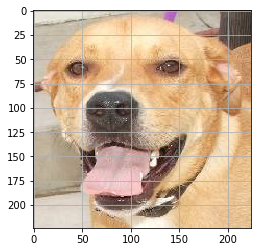

Predicted: [('n02099712', 'Labrador_retriever', 0.7821225), ('n02093256', 'Staffordshire_bullterrier', 0.031682275), ('n02093428', 'American_Staffordshire_terrier', 0.027616305)]


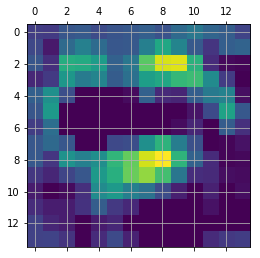

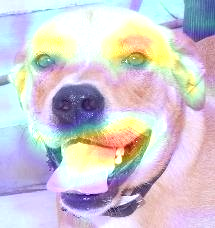

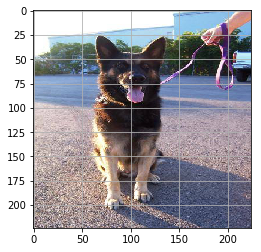

Predicted: [('n02106662', 'German_shepherd', 0.46861014), ('n02105412', 'kelpie', 0.32945508), ('n02113023', 'Pembroke', 0.09951078)]


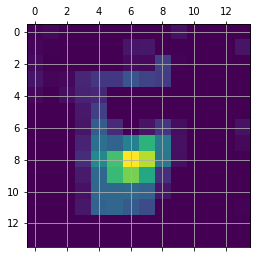

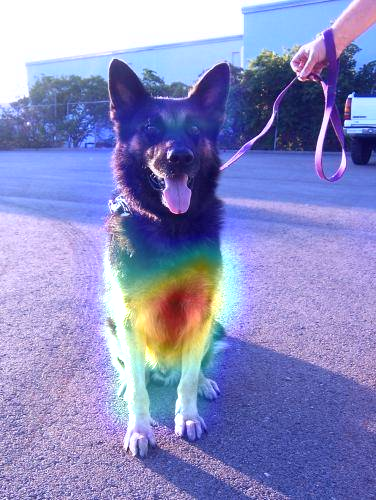

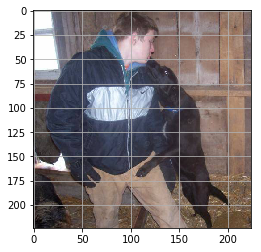

Predicted: [('n02093256', 'Staffordshire_bullterrier', 0.28424674), ('n02097130', 'giant_schnauzer', 0.08879052), ('n02106550', 'Rottweiler', 0.069548465)]


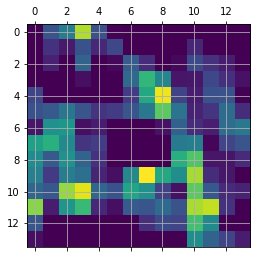

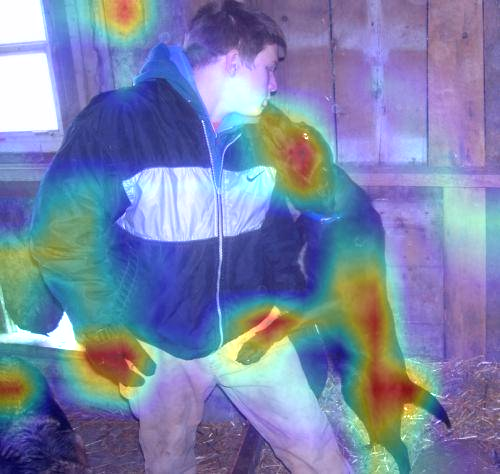

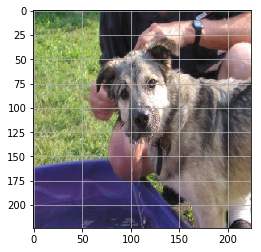

Predicted: [('n02106662', 'German_shepherd', 0.5916806), ('n02090721', 'Irish_wolfhound', 0.15991038), ('n02091635', 'otterhound', 0.038694847)]


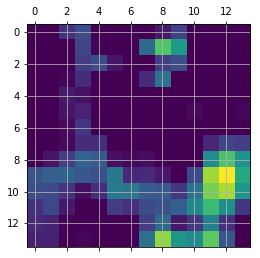

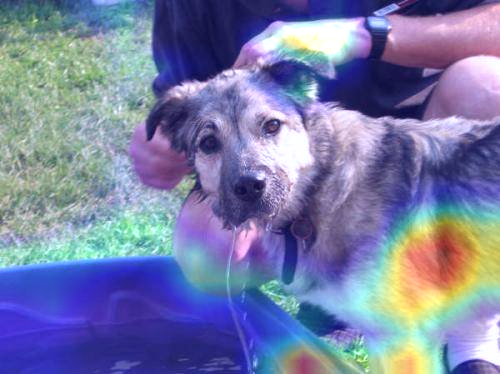

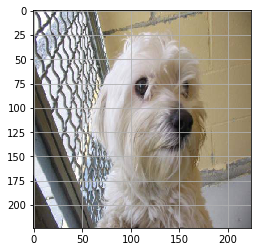

Predicted: [('n02098286', 'West_Highland_white_terrier', 0.79974306), ('n02085936', 'Maltese_dog', 0.14729059), ('n02098105', 'soft-coated_wheaten_terrier', 0.013409598)]


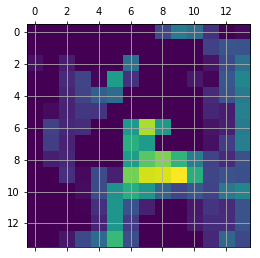

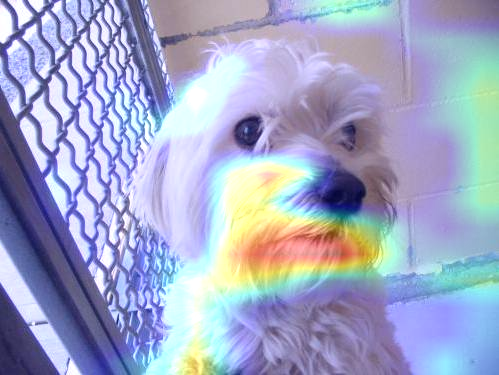

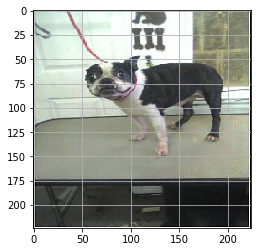

Predicted: [('n02096585', 'Boston_bull', 0.8225341), ('n02108915', 'French_bulldog', 0.076253876), ('n02085620', 'Chihuahua', 0.02684176)]


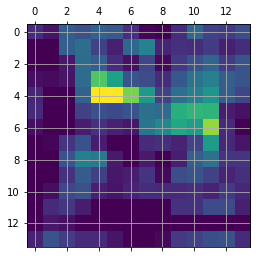

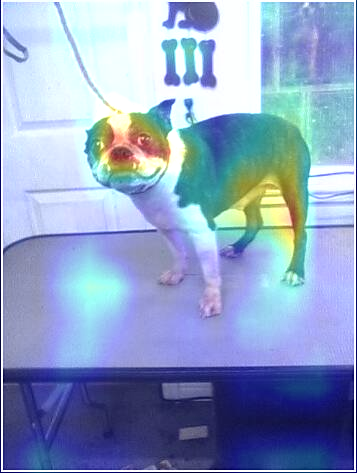

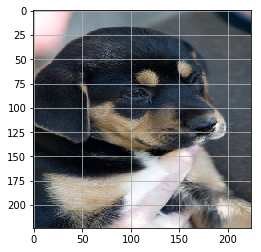

Predicted: [('n02106550', 'Rottweiler', 0.7913433), ('n02108000', 'EntleBucher', 0.06905435), ('n02105412', 'kelpie', 0.04138299)]


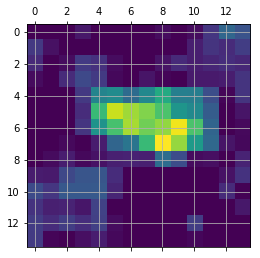

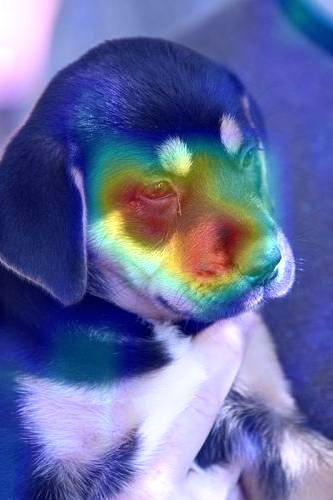

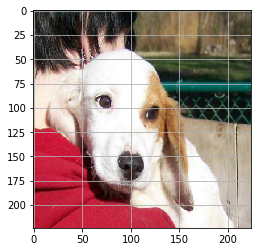

Predicted: [('n02089867', 'Walker_hound', 0.19462293), ('n02100735', 'English_setter', 0.10451189), ('n02091831', 'Saluki', 0.103440076)]


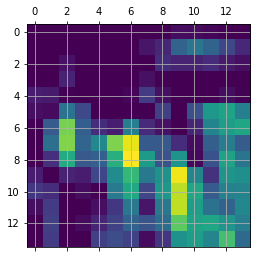

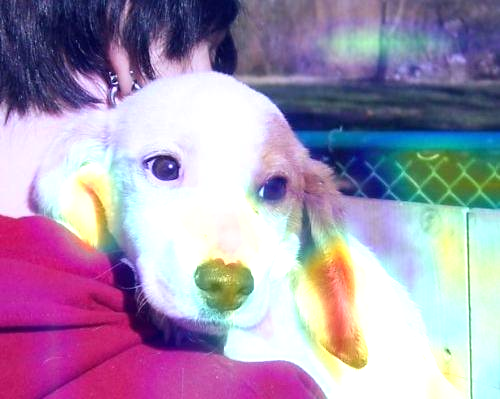

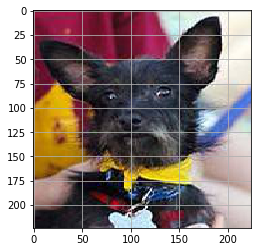

Predicted: [('n02097298', 'Scotch_terrier', 0.80689174), ('n02096177', 'cairn', 0.15354924), ('n02094258', 'Norwich_terrier', 0.009986814)]


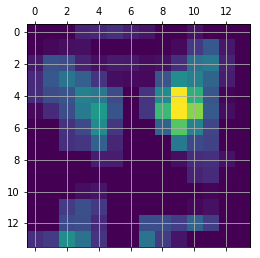

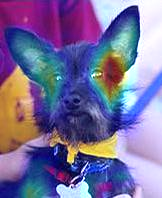

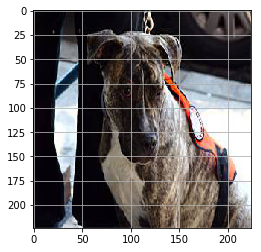

Predicted: [('n02109047', 'Great_Dane', 0.75658613), ('n02100236', 'German_short-haired_pointer', 0.043027304), ('n02108089', 'boxer', 0.032788653)]


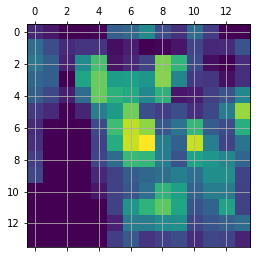

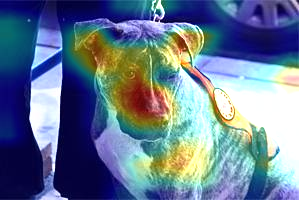

In [159]:
process_image(dog_img1)
process_image(dog_img2)
process_image(dog_img3)
process_image(dog_img4)
process_image(dog_img5)
process_image(dog_img6)
process_image(dog_img7)
process_image(dog_img8)
process_image(dog_img9)
process_image(dog_img10)
